VERİLERİ BİRLEŞTİRME

In [25]:
import pandas as pd

birlesik_df = pd.concat([pd.read_excel(dosya) for dosya in ['temmuz.xlsx', 'agustos2.xlsx', 'eylul11.xlsx', 'ekim14.xlsx']])

# Birleştirilmiş veriyi 'birlesik_veri.csv' olarak kaydet
birlesik_df.to_csv('birlesik_veri.csv', index=False)

print(birlesik_df.head())

        id  intersection_id          start_time            end_time  \
0  3736612              354 2022-07-01 00:05:00 2022-07-01 00:10:00   
1  3736613              354 2022-07-01 00:05:00 2022-07-01 00:10:00   
2  3736614              354 2022-07-01 00:05:00 2022-07-01 00:10:00   
3  3736615              354 2022-07-01 00:05:00 2022-07-01 00:10:00   
4  3736616              354 2022-07-01 00:05:00 2022-07-01 00:10:00   

   detector_id  camera_id  class_id  direction  total  occupancy_time  speed  
0            1          1         1          0     65             317    117  
1            2          1         1          0     76             392     97  
2            2          1         4          0      6             350     90  
3            2          1         5          0      6             339     94  
4            3          1         1          0     39             396     87  


In [26]:
birlesik_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248649 entries, 0 to 30518
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               248649 non-null  int64         
 1   intersection_id  248649 non-null  int64         
 2   start_time       248649 non-null  datetime64[ns]
 3   end_time         248649 non-null  datetime64[ns]
 4   detector_id      248649 non-null  int64         
 5   camera_id        248649 non-null  int64         
 6   class_id         248649 non-null  int64         
 7   direction        248649 non-null  int64         
 8   total            248649 non-null  int64         
 9   occupancy_time   248649 non-null  int64         
 10  speed            248649 non-null  int64         
dtypes: datetime64[ns](2), int64(9)
memory usage: 22.8 MB


AYLARA GÖRE TOPLAM GEÇEN ARAÇ SAYISI

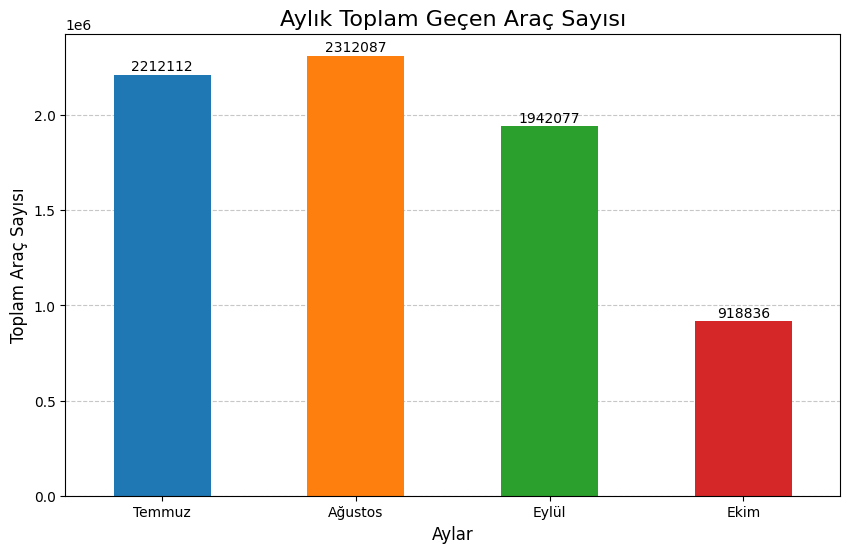

In [27]:
import matplotlib.pyplot as plt

# ay sütunu
birlesik_df['ay'] = birlesik_df['start_time'].dt.month

# aynı ay içindeki toplam araç sayısı
aylik_toplam = birlesik_df.groupby('ay')['total'].sum()

# ay isimlendirmesi
ay_isimleri = {
    7: 'Temmuz',
    8: 'Ağustos',
    9: 'Eylül',
    10: 'Ekim'
}

# aylar "month" metodundan kaynaklı olarak kaçıncı ay ise o sayı ile isimlendirme yapılır. bu şekilde yukarıda ki sözlük ile eşleştirilir
aylik_toplam.index = aylik_toplam.index.map(ay_isimleri)

plt.figure(figsize=(10, 6))
aylik_toplam.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], zorder=2) # zorder çubukları ızgaranın önüne getirir
plt.title('Aylık Toplam Geçen Araç Sayısı', fontsize=16)
plt.xlabel('Aylar', fontsize=12)
plt.ylabel('Toplam Araç Sayısı', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for index, value in enumerate(aylik_toplam): # enumerate ile index ve value alınıyor ve eşleniyor
    plt.text(index, value + 5000, f'{int(value)}', ha='center', va='bottom') # ha yatay ortalama , va dikey ortalamadır
    # value sütunların en tepesidir +5000 ile değerlerin üzerine yazı yazdırılır böylece çubukların üstünde görünür iç içe girmez

plt.show()

--eylül ayındaki ani düşüş veri eksikliğinden kaynaklıdır

ARAÇ SINIF DAĞILIMI

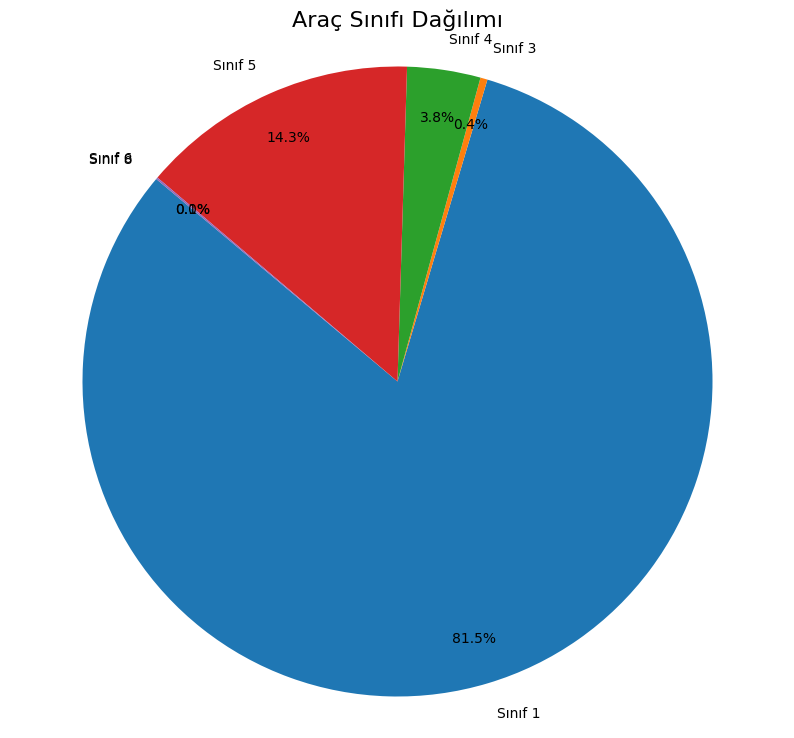

class_id
1    6019095
3      26865
4     277772
5    1054352
6       6626
8        402
Name: total, dtype: int64


In [28]:
# sınıf gruplaması yaparak her araç sınıfının toplamı hesaplandı
arac_sinifi_toplam = birlesik_df.groupby('class_id')['total'].sum()

# grafik için etiketler oluşturuldu
labels = [f'Sınıf {id}' for id in arac_sinifi_toplam.index] # araç sınıf indexleri tek tek etiketlere dönüştürüldü isimlendirme için

# pasta grafiği
plt.figure(figsize=(10, 9))
plt.pie(
    arac_sinifi_toplam, # pasta grafiği için sayısal veriler
    labels=labels, # pasta dilim isimleri
    autopct='%1.1f%%', # Dilimlerin üzerine yüzdelik oranları yazdırma (virgül sonrası 1 basamak gösterir)
    startangle=140,     # Grafiğin başlangıç açısı
    pctdistance=0.85    # Yüzde etiketlerinin merkezden uzaklığı
)

plt.axis('equal')
plt.title('Araç Sınıfı Dağılımı', fontsize=16)
plt.show()

print(arac_sinifi_toplam)


ilk bakış olarak hangi sınıfın hangi araç kategorisine ait oluduğu çıkarımı yapılıbilir. Açıkça ortada olan belli sınıf araçlar vardır sınıf 1 in otomobil olduğu gibi ancak diğer kategorilerin tespiti için saatlik kullanım ve dedektör işgaliye verileri gözden geçirmek gerekir. 

ARAÇ SINIF ORTALAMA HZI

Araç Sınıflarına Göre Ortalama Hızlar (km/s):
class_id
3    76.523608
6    76.230106
1    72.959249
8    70.938650
4    70.560180
5    68.991410
Name: speed, dtype: float64


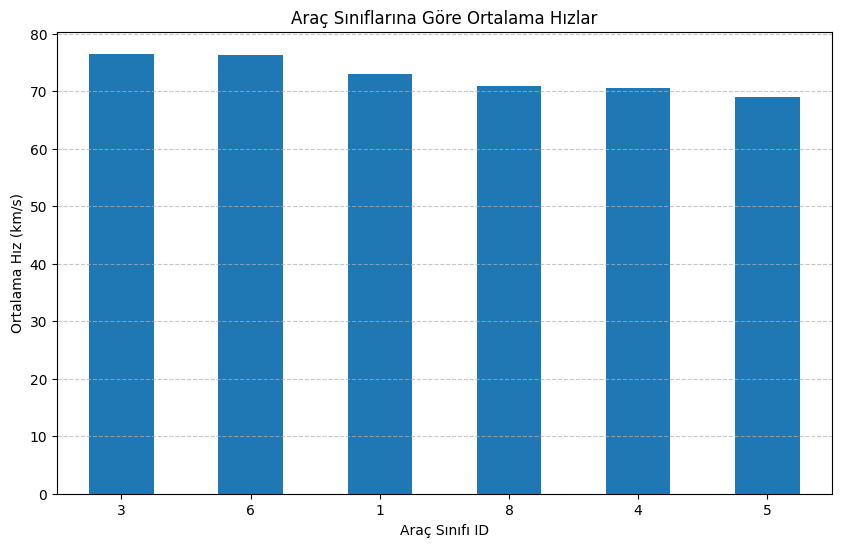

In [29]:
# Her araç sınıfının ortalama hızını hesaplayın
ortalama_hizlar = birlesik_df.groupby('class_id')['speed'].mean().sort_values(ascending=False)

print("Araç Sınıflarına Göre Ortalama Hızlar (km/s):")
print(ortalama_hizlar)

# Sonucu bir sütun grafiği ile görselleştirelim
ortalama_hizlar.plot(kind='bar', figsize=(10, 6))
plt.title('Araç Sınıflarına Göre Ortalama Hızlar')
plt.xlabel('Araç Sınıfı ID')
plt.ylabel('Ortalama Hız (km/s)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

tüm araç sınıflarının hızlarının yakın olmasının sebebi yolu kullanım saatlerine yani yoğunluğa bağlı olabilir. Örneğin ağır vasıta yani lojistik için kullanılan araçlar genelde gece yoğunluğun olmadığı saatlerde çalıştığından hızları diğere sınıflara yakın olabilir.

12-14 SAATLERİ ARASI TOPLAM ARAÇ GEÇİŞİ

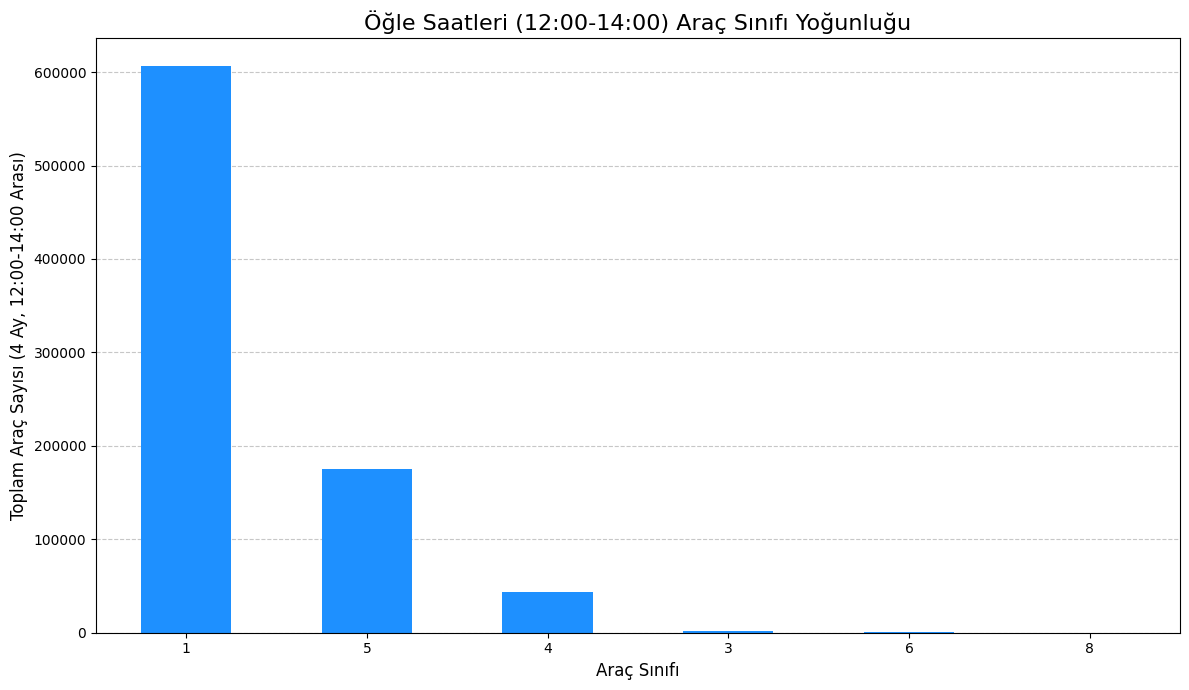

class_id
1    606218
5    175730
4     43890
3      2308
6       407
8        34
Name: total, dtype: int64


In [30]:
# öğle saatleri verisini filtrele ve grupla
ogle_df = birlesik_df[birlesik_df['start_time'].dt.hour.isin([12, 13])]
ogle_arac_toplamlari = ogle_df.groupby('class_id')['total'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
ogle_arac_toplamlari.plot(kind='bar', color='dodgerblue', zorder=2)

plt.title('Öğle Saatleri (12:00-14:00) Araç Sınıfı Yoğunluğu', fontsize=16)
# X ekseni etiketi güncellendi
plt.xlabel('Araç Sınıfı', fontsize=12)
plt.ylabel('Toplam Araç Sayısı (4 Ay, 12:00-14:00 Arası)', fontsize=12)
plt.xticks(rotation=0 # açı) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(ogle_arac_toplamlari)

TÜM GÜN İÇİ KULLANIM İLE 12-14 ARASI KULLANIM FARKI

Araç Sınıfı Oranlarının Karşılaştırması:
          Genel Oran (%)  Öğle Saati Oranı (%)  Fark
class_id                                            
5                  14.28                 21.21  6.93
4                   3.76                  5.30  1.54
8                   0.01                  0.00 -0.00
6                   0.09                  0.05 -0.04
3                   0.36                  0.28 -0.09
1                  81.50                 73.16 -8.34


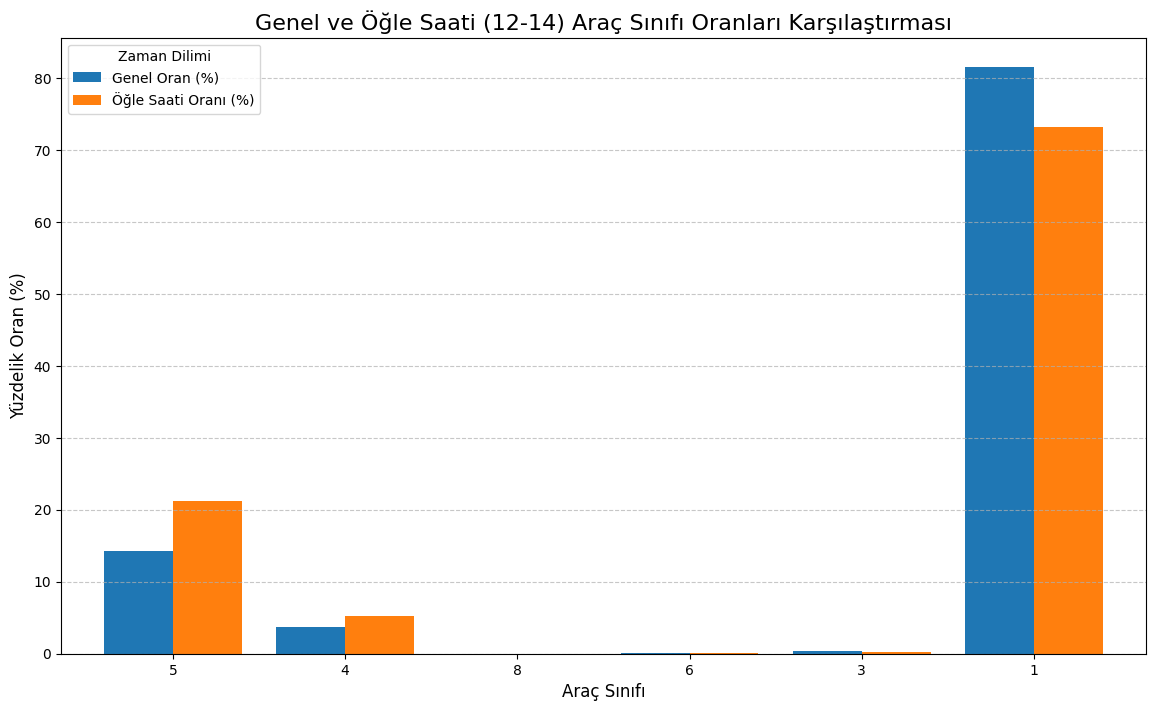

In [31]:
# Her sınıfın tüm gün içindeki toplam araç sayısı
genel_toplamlar = birlesik_df.groupby('class_id')['total'].sum()
# Bu toplamları tüm araçların toplamına bölerek yüzdelik oranları
genel_oranlar = (genel_toplamlar / genel_toplamlar.sum()) * 100

# Veriyi sadece 12:00 ve 13:00 saatlerine filtrele
ogle_df = birlesik_df[birlesik_df['start_time'].dt.hour.isin([12, 13])]
# Öğle saatlerindeki her sınıfın toplamını bul
ogle_toplamlari = ogle_df.groupby('class_id')['total'].sum()
# Bu toplamları öğle saatlerindeki tüm araçların toplamına bölerek oranları bul
ogle_oranlari = (ogle_toplamlari / ogle_toplamlari.sum()) * 100

# İki oranı tek bir DataFrame'de birleştir
karsilastirma_df = pd.DataFrame({
    'Genel Oran (%)': genel_oranlar,
    'Öğle Saati Oranı (%)': ogle_oranlari
})
# Farkı daha net görmek için bir "Fark" sütunu ekle
karsilastirma_df['Fark'] = karsilastirma_df['Öğle Saati Oranı (%)'] - karsilastirma_df['Genel Oran (%)']
# NaN (veri olmayan) değerleri 0 ile doldur ve tabloyu sırala
karsilastirma_df = karsilastirma_df.fillna(0).sort_values(by='Fark', ascending=False)

# Tabloyu ekrana yazdır
print("Araç Sınıfı Oranlarının Karşılaştırması:")
print(karsilastirma_df.round(2)) # .round(2) ile sayıları virgülden sonra 2 basamağa yuvarla

# Sadece oranları içeren kısmı grafiğe dök
karsilastirma_df[['Genel Oran (%)', 'Öğle Saati Oranı (%)']].plot(
    kind='bar',
    figsize=(14, 8),
    width=0.8 # Çubukların genişliği
)

plt.title('Genel ve Öğle Saati (12-14) Araç Sınıfı Oranları Karşılaştırması', fontsize=16)
plt.xlabel('Araç Sınıfı', fontsize=12)
plt.ylabel('Yüzdelik Oran (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Zaman Dilimi')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Grafiği göster
plt.show()

bu verilere dayanarak öğle saatindeki sınıf 5 de ciddi artış vardır. Miktar, hız, yoğunluk verilerine bakarak motorların sınıf 5 sonucuna varabiliriz ancak son bir test daha yapalım

ORTALAMA İŞGALİYE SÜRESİ

Araç Başına Ortalama İşgaliye Süresi (ms/araç):
class_id
1     20.91
5     44.03
4     96.01
6    115.22
8    227.11
3    390.76
dtype: float64


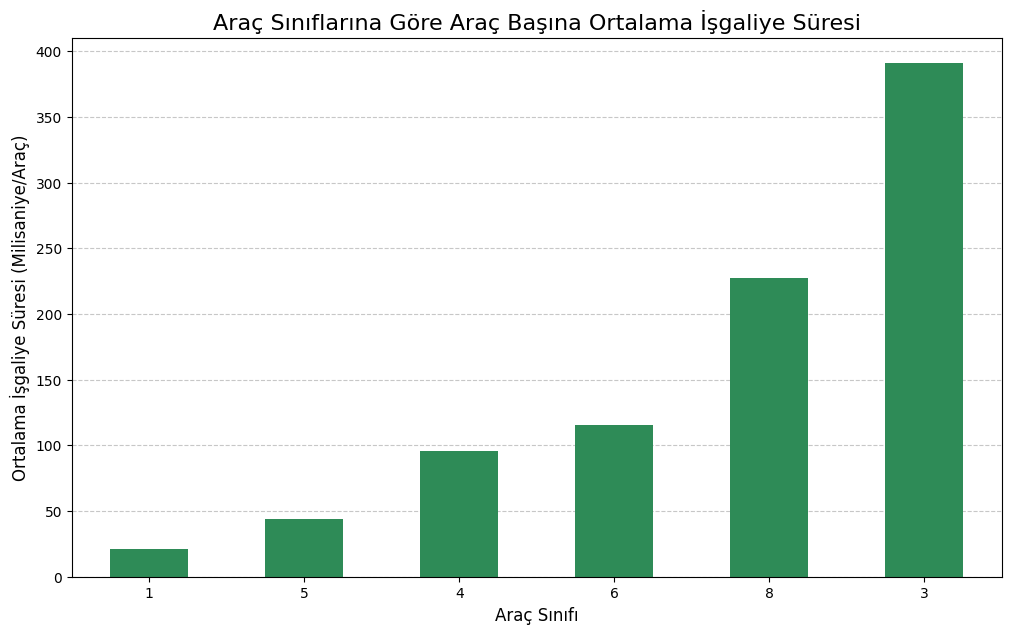

In [32]:
# Her sınıf için toplam işgaliye süresini hesapla
toplam_isgaliye_suresi = birlesik_df.groupby('class_id')['occupancy_time'].sum()

# Her sınıf için toplam araç sayısını hesapla
toplam_arac_sayisi = birlesik_df.groupby('class_id')['total'].sum()

# Araç başına ortalama işgaliye süresini bul (Toplam Süre / Toplam Araç)
# ve en düşükten büyüğe doğru sırala
arac_basi_isgaliye = (toplam_isgaliye_suresi / toplam_arac_sayisi).sort_values()

print("Araç Başına Ortalama İşgaliye Süresi (ms/araç):")
print(arac_basi_isgaliye.round(2))
plt.figure(figsize=(12, 7))
arac_basi_isgaliye.plot(kind='bar', color='seagreen', zorder=2)
plt.title('Araç Sınıflarına Göre Araç Başına Ortalama İşgaliye Süresi', fontsize=16)
plt.xlabel('Araç Sınıfı', fontsize=12)
plt.ylabel('Ortalama İşgaliye Süresi (Milisaniye/Araç)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

bu sonuçlarla sınıf 5 kesinlikle motorsiklet taşıtlarına aittir. sınıf 1 de otomobil ancak bu kadar düşük çıkmasının sebebi ciddi derece fazla olduğundan trafiksiz zamanlarda yüksek hızlarda geçişlerinden kaynaklı olabilir.

AĞIR VASITA TESPİTİ İÇİN GECE YOĞUNLUĞU

Ağır Vasıta Analizi: Genel ve Gece (22:00-05:00) Oranları Karşılaştırması
          Genel Oran (%)  Gece Oranı (22-05) (%)   Fark
class_id                                               
1                  81.50                   95.35  13.84
6                   0.09                    0.09   0.00
8                   0.01                    0.01   0.00
3                   0.36                    0.15  -0.21
4                   3.76                    1.14  -2.62
5                  14.28                    3.26 -11.01


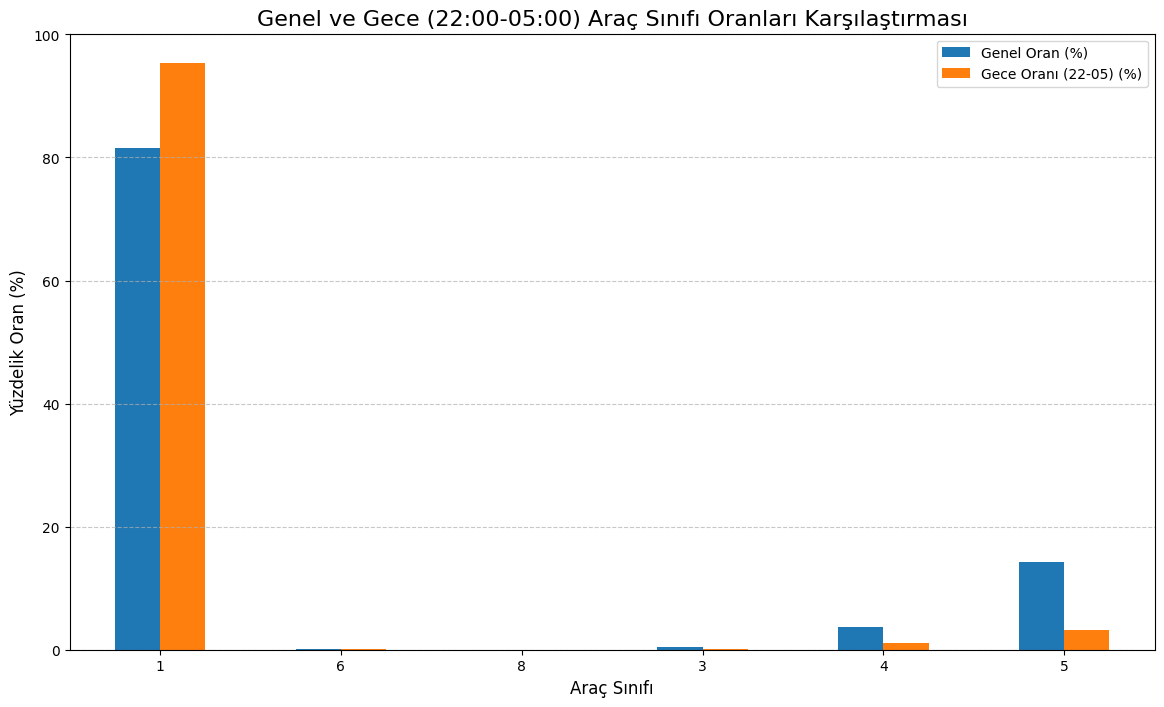

In [33]:
# saat filtresi
gece_df = birlesik_df[(birlesik_df['start_time'].dt.hour >= 22) | (birlesik_df['start_time'].dt.hour < 5)]

# belirlenen saat için her sınıfın toplamını hesapla
gece_toplamlari = gece_df.groupby('class_id')['total'].sum()
# Gece saatlerindeki yüzdelik oranları hesapla
gece_oranlari = (gece_toplamlari / gece_toplamlari.sum()) * 100
# karşılaştırma için genel oranları da tekrar hesapla
genel_toplamlar = birlesik_df.groupby('class_id')['total'].sum()
genel_oranlar = (genel_toplamlar / genel_toplamlar.sum()) * 100

# tek bir DataFrame oluştur
gece_karsilastirma_df = pd.DataFrame({
    'Genel Oran (%)': genel_oranlar,
    'Gece Oranı (22-05) (%)': gece_oranlari
}).fillna(0) # Veri olmayan sınıflar için NaN yerine 0 yaz

# fark sütunu
gece_karsilastirma_df['Fark'] = gece_karsilastirma_df['Gece Oranı (22-05) (%)'] - gece_karsilastirma_df['Genel Oran (%)']

# Tabloyu farka göre büyükten küçüğe sırala
gece_karsilastirma_df = gece_karsilastirma_df.sort_values(by='Fark', ascending=False)

print("Ağır Vasıta Analizi: Genel ve Gece (22:00-05:00) Oranları Karşılaştırması")
print(gece_karsilastirma_df.round(2))

gece_karsilastirma_df[['Genel Oran (%)', 'Gece Oranı (22-05) (%)']].plot(
    kind='bar',
    figsize=(14, 8)
)
plt.title('Genel ve Gece (22:00-05:00) Araç Sınıfı Oranları Karşılaştırması', fontsize=16)
plt.xlabel('Araç Sınıfı', fontsize=12)
plt.ylabel('Yüzdelik Oran (%)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

ağır vasıta araçlarının trafikte yoğunluğu önlemek için lojistik işlerini geç saatlerde yapabileceğini düşündüm ancak ciddi otomobil sayısı olduğundan ve örnek az olduğundan verimli sonuç olmadı bunun yerine total de geçen araçlarının geçişlerinin yüzde kaçını gece yaptığına bakalım

GEÇİŞLERİN YÜZDE KAÇINI GECE YAPTIKLARI

Her Sınıfın Kendi Toplamı İçindeki Gece Trafiği Payı (%):
class_id
1    18.07
3     6.47
4     4.67
5     3.53
6    16.01
8    20.65
Name: total, dtype: float64


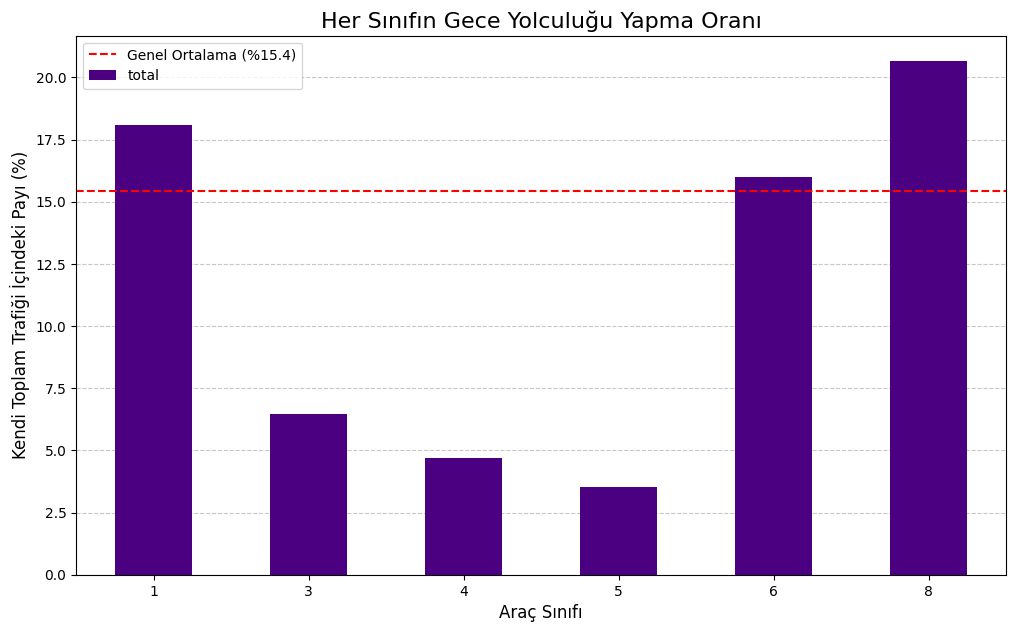

In [34]:
gece_df = birlesik_df[(birlesik_df['start_time'].dt.hour >= 22) | (birlesik_df['start_time'].dt.hour < 5)]
gece_toplamlari = gece_df.groupby('class_id')['total'].sum()
genel_toplamlar = birlesik_df.groupby('class_id')['total'].sum()

# Her sınıfın KENDİ toplamı içindeki gece geçiş oranını hesapla
# (Gece Geçen Araç Sayısı / O Sınıfın Toplam Araç Sayısı) * 100
kendi_icindeki_gece_orani = (gece_toplamlari / genel_toplamlar) * 100

# Sonuçları tablo olarak yazdır
print("Her Sınıfın Kendi Toplamı İçindeki Gece Trafiği Payı (%):")
print(kendi_icindeki_gece_orani.round(2))

# Sonucu bir sütun grafiği ile görselleştirelim
plt.figure(figsize=(12, 7))
kendi_icindeki_gece_orani.plot(kind='bar', color='indigo', zorder=2)

plt.title('Her Sınıfın Gece Yolculuğu Yapma Oranı', fontsize=16)
plt.xlabel('Araç Sınıfı', fontsize=12)
plt.ylabel('Kendi Toplam Trafiği İçindeki Payı (%)', fontsize=12)

# Tüm trafiğin ortalama gece oranını bir çizgi ile gösterelim
# Bu çizginin üzerinde kalanlar, ortalamadan daha çok gece yolculuğu yapıyor demektir.
ortalama_gece_orani = (gece_toplamlari.sum() / genel_toplamlar.sum()) * 100
plt.axhline(y=ortalama_gece_orani, color='red', linestyle='--', label=f'Genel Ortalama (%{ortalama_gece_orani:.1f})')

plt.legend()
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

6 ve 8 numaralı sınıflar hareketlerinin ciddi boyutunu gece yaptıkları görülmüştür. Bu sebeple bu numaralı sınıflar kesinlike ağır vasıta araçlardır. 1-otomobil , 3-minivan , 4-panelvan , 5-motor , 6,8-ağır vasıta olarak tahmin edilmektedir.

ARAÇ SINIFLARININ ÇIKTIĞI MAKSİMUM ORT. HIZLAR

Araç Sınıflarına Göre Ulaşılan Maksimum Hızlar (km/s):
class_id
1    149
3    149
4    149
5    149
6    149
8    149
Name: speed, dtype: int64


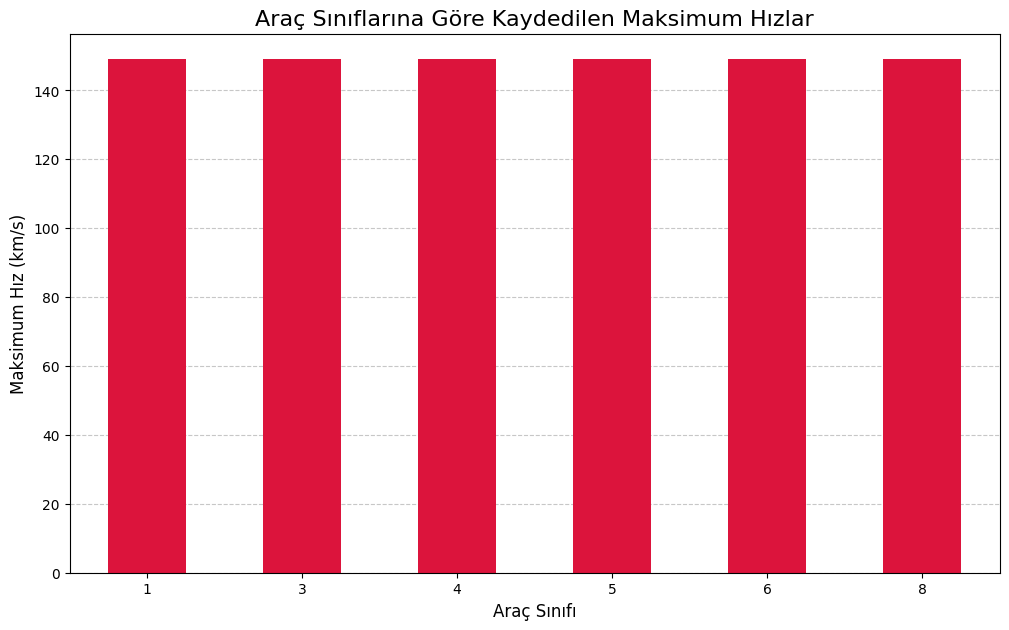

In [35]:
# Her sınıf için kaydedilen maksimum hızı bul ve sırala
maksimum_hizlar = birlesik_df.groupby('class_id')['speed'].max().sort_values(ascending=False)

# Sonuçları tablo olarak yazdır
print("Araç Sınıflarına Göre Ulaşılan Maksimum Hızlar (km/s):")
print(maksimum_hizlar)

plt.figure(figsize=(12, 7))
maksimum_hizlar.plot(kind='bar', color='crimson', zorder=2)
plt.title('Araç Sınıflarına Göre Kaydedilen Maksimum Hızlar', fontsize=16)
plt.xlabel('Araç Sınıfı', fontsize=12)
plt.ylabel('Maksimum Hız (km/s)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

sistem limiti 149 olduğundan tutarlı bilgi vermemektedir